THZ breast cancer image segmentation using  custom U-net

*   name          - Piyush Gutpa
*   reg:no        - 123me0031
*   supervised by - Dr.Prasad
*   date of presentation - 13/3/25





In [ ]:
# importing google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing all dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset,DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import PIL as pil

In [ ]:
# # now the dataset to be worked upon was already imported to google drive at this
# hold = '/content/drive/MyDrive/Colab Notebooks/datasets/emf_terhertz_breastcancerdataset/Cancer images.rar'
# # but we need to unzipp this file first
# !pip install patool
# import patoolib
# patoolib.extract_archive(hold, outdir='/content/drive/MyDrive/Colab Notebooks/datasets/emf_terhertz_breastcancerdataset/')

In [ ]:

# # Install LibreOffice
# !apt-get install -y libreoffice

# # Import necessary libraries
# import os
# from glob import glob
# from PIL import Image as PILImage
# from torch.utils.data import Dataset, DataLoader
# from torchvision import transforms
# import matplotlib.pyplot as plt
# import torchvision

# # Directories
# input_dir = '/content/drive/MyDrive/Colab Notebooks/datasets/emf_terhertz_breastcancerdataset/'
# output_dir = '/content/drive/MyDrive/Colab Notebooks/datasets/emf_to_png/'

# # Create output directory
# os.makedirs(output_dir, exist_ok=True)

# # Function to convert .emf files to .png using LibreOffice
# def convert_emf_to_png_libreoffice(input_dir, output_dir):
#     emf_files = glob(os.path.join(input_dir, '**/*.emf'), recursive=True)
#     for file_path in emf_files:
#         output_path = os.path.join(output_dir, os.path.splitext(os.path.basename(file_path))[0] + '.png')
#         # Use LibreOffice to convert .emf to .png
#         os.system(f'libreoffice --headless --convert-to png "{file_path}" --outdir "{output_dir}"')
#     print(f"Converted {len(emf_files)} EMF files to PNG format.")

# # Convert files
# convert_emf_to_png_libreoffice(input_dir, output_dir)

# # Preprocessing the Images - PyTorch Dataset
# class EMFDataset(Dataset):
#     def __init__(self, root_dir, transform=None):
#         self.image_paths = glob(os.path.join(root_dir, '*.png'))  # Load all PNG files
#         self.transform = transform

#     def __len__(self):
#         return len(self.image_paths)

#     def __getitem__(self, idx):
#         img_path = self.image_paths[idx]
#         image = PILImage.open(img_path).convert('RGB')  # Ensure RGB format

#         if self.transform:
#             image = self.transform(image)

#         # Assign label based on folder name (assuming folder indicates class)
#         label = 1 if 'cancer' in img_path.lower() else 0
#         return image, label

# # Define transformations
# transform = transforms.Compose([
#     transforms.Resize((256, 256)),  # Resize to 256x256
#     transforms.ToTensor(),          # Convert to PyTorch tensor
#     transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [-1, 1]
# ])

# # Create Dataset and DataLoader
# dataset = EMFDataset(output_dir, transform=transform)
# dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

# # Visualize a few images
# def visualize_batch(dataloader):
#     batch = next(iter(dataloader))
#     images, labels = batch
#     grid = torchvision.utils.make_grid(images[:8], nrow=4, normalize=True)
#     plt.figure(figsize=(10, 5))
#     plt.imshow(grid.permute(1, 2, 0))  # Convert from CxHxW to HxWxC
#     plt.title("Sample Images")
#     plt.axis("off")
#     plt.show()

# # Display a batch of images
# visualize_batch(dataloader)



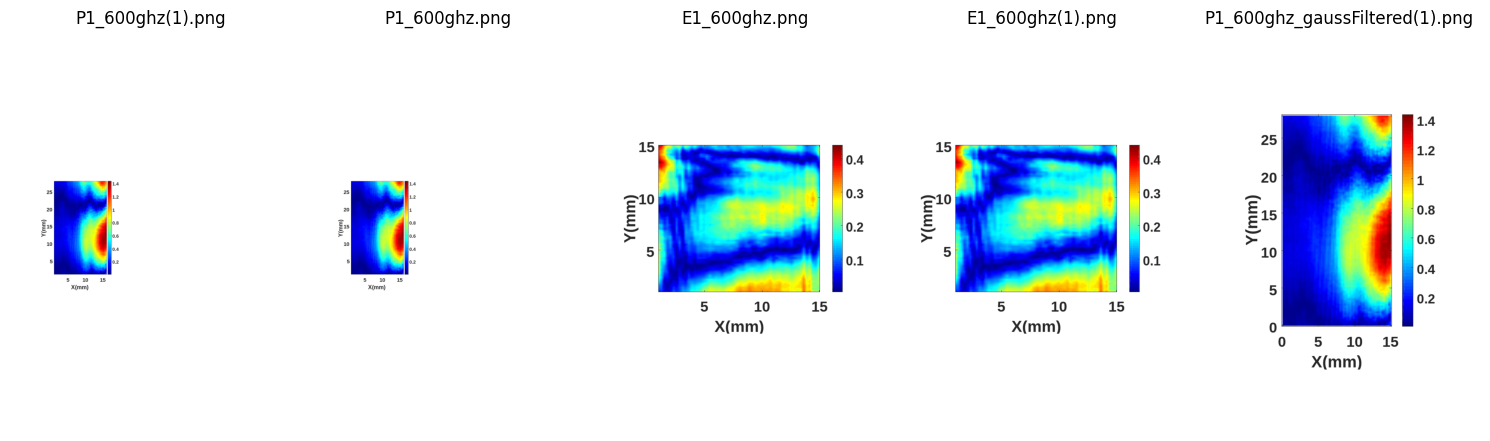

In [ ]:
# inspecting image quality of few images
from PIL import Image
import matplotlib.pyplot as plt
import os
from glob import glob

# Define the directory containing processed images
processed_images_dir = '/content/drive/MyDrive/Colab Notebooks/datasets/emf_to_png/'

# List all PNG files in the directory
image_files = glob(os.path.join(processed_images_dir, '*.png'))

# Display a few images
def display_images(image_files, n=5):
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(image_files[:n]):
        image = Image.open(img_path)
        plt.subplot(1, n, i + 1)
        plt.imshow(image)
        plt.title(os.path.basename(img_path))
        plt.axis("off")
    plt.tight_layout()
    plt.show()

display_images(image_files)



In [ ]:
# individual image size , format and mode
def inspect_image_properties(image_files, n=5):
    for img_path in image_files[:n]:
        image = Image.open(img_path)
        print(f"Image: {os.path.basename(img_path)}")
        print(f" - Format: {image.format}")
        print(f" - Size (Width x Height): {image.size}")
        print(f" - Mode (e.g., RGB, Grayscale): {image.mode}")
        print(f" - File Size: {os.path.getsize(img_path) / 1024:.2f} KB\n")

inspect_image_properties(image_files)


Image: P1_600ghz(1).png
 - Format: PNG
 - Size (Width x Height): (794, 1123)
 - Mode (e.g., RGB, Grayscale): RGBA
 - File Size: 60.60 KB

Image: P1_600ghz.png
 - Format: PNG
 - Size (Width x Height): (794, 1123)
 - Mode (e.g., RGB, Grayscale): RGBA
 - File Size: 60.60 KB

Image: E1_600ghz.png
 - Format: PNG
 - Size (Width x Height): (794, 1123)
 - Mode (e.g., RGB, Grayscale): RGBA
 - File Size: 169.14 KB

Image: E1_600ghz(1).png
 - Format: PNG
 - Size (Width x Height): (794, 1123)
 - Mode (e.g., RGB, Grayscale): RGBA
 - File Size: 169.14 KB

Image: P1_600ghz_gaussFiltered(1).png
 - Format: PNG
 - Size (Width x Height): (794, 1123)
 - Mode (e.g., RGB, Grayscale): RGBA
 - File Size: 144.13 KB



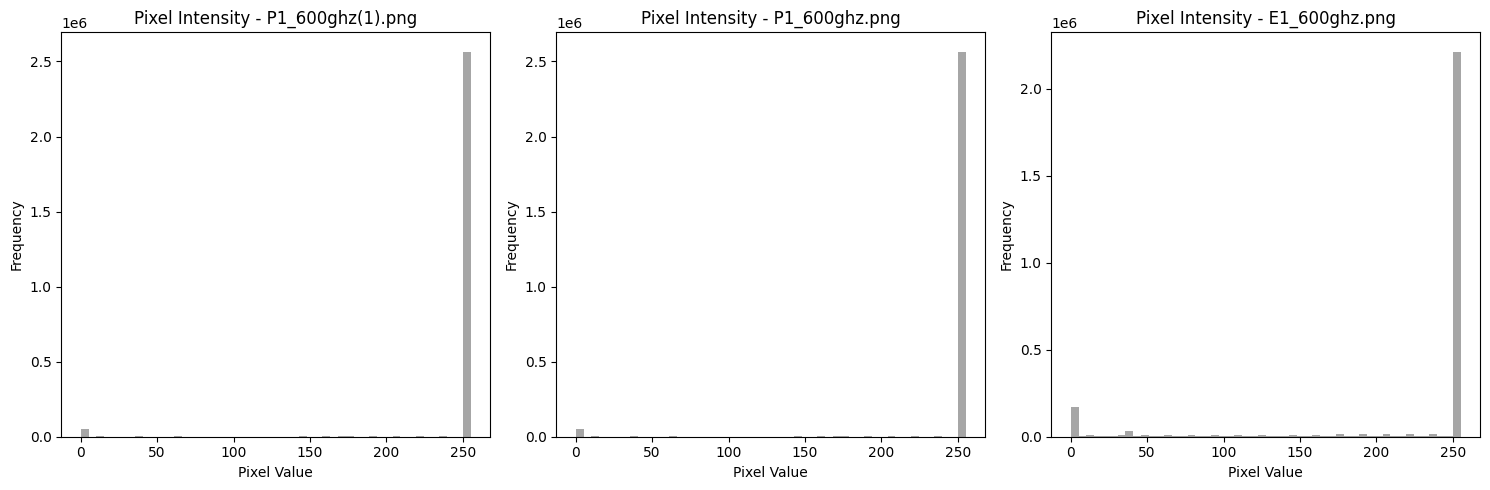

219

In [ ]:
#analyze the pixel instensity distribution
import numpy as np

def plot_pixel_intensity(image_files, n=3):
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(image_files[:n]):
        image = Image.open(img_path).convert('RGB')
        pixels = np.array(image).flatten()  # Flatten pixel values
        plt.subplot(1, n, i + 1)
        plt.hist(pixels, bins=50, color='gray', alpha=0.7)
        plt.title(f"Pixel Intensity - {os.path.basename(img_path)}")
        plt.xlabel("Pixel Value")
        plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

plot_pixel_intensity(image_files)
# number of images present inside the processed folder is
len(image_files)

In [ ]:
# as we can see there  are only total of 73 images present we need to perform preprocess and data augementation to reduce the chance of getting an overfitted model

# just chaning the names for defining new dataloader its the same code as above
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os
from glob import glob

# Define the processed folder directory
processed_images_dir = '/content/drive/MyDrive/Colab Notebooks/datasets/emf_to_png/'

# Define transformations
preprocessing_transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize all images to 256x256
    transforms.ToTensor(),          # Convert image to PyTorch tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize to [-1, 1]
])

# Define PyTorch Dataset
class EMFDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.image_paths = glob(os.path.join(root_dir, '*.png'))
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        label = 1 if 'cancer' in img_path.lower() else 0  # Label assignment
        if self.transform:
            image = self.transform(image)
        return image, label

# Create dataset and dataloader
dataset = EMFDataset(processed_images_dir, transform=preprocessing_transform)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

# Check dataset size
print(f"Total images in dataset: {len(dataset)}")




Total images in dataset: 219


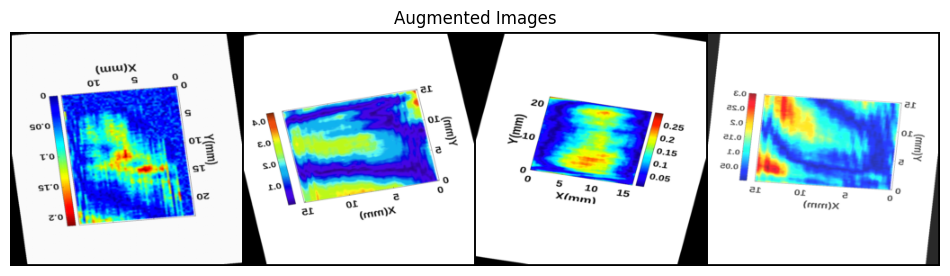

219

In [ ]:
# Define augmentation transformations
augmentation_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),       # 50% chance of horizontal flip
    transforms.RandomVerticalFlip(p=0.5),         # 50% chance of vertical flip
    transforms.RandomRotation(degrees=20),        # Random rotation within 20 degrees
    transforms.ColorJitter(brightness=0.2,        # Adjust brightness
                           contrast=0.2,          # Adjust contrast
                           saturation=0.2,        # Adjust saturation
                           hue=0.1),              # Adjust hue
    transforms.RandomResizedCrop(size=(256, 256), scale=(0.8, 1.0)),  # Random cropping
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Dataset with Augmentation
augmented_dataset = EMFDataset(processed_images_dir, transform=augmentation_transform)
augmented_dataloader = DataLoader(augmented_dataset, batch_size=4, shuffle=True)

# Visualize Augmented Images
import matplotlib.pyplot as plt
import torchvision

def visualize_augmented_images(dataloader, n=8):
    batch = next(iter(dataloader))
    images, labels = batch
    grid = torchvision.utils.make_grid(images[:n], nrow=4, normalize=True)
    plt.figure(figsize=(12, 6))
    plt.imshow(grid.permute(1, 2, 0))
    plt.title("Augmented Images")
    plt.axis("off")
    plt.show()

visualize_augmented_images(augmented_dataloader)
# new number  of total images in augumentateed image
len(augmented_dataset)

In [ ]:
# import os
# import random
# from torchvision import transforms
# from PIL import Image, ImageEnhance, ImageChops, ImageFilter
# from glob import glob

# # Directories
# input_dir = '/content/drive/MyDrive/Colab Notebooks/datasets/emf_to_png/'
# output_dir = '/content/drive/MyDrive/Colab Notebooks/datasets/png_final_augumentated/'

# os.makedirs(output_dir, exist_ok=True)

# # Function to blend the image with a blurred version to handle blank spots
# def blend_with_blurred_background(image, alpha=0.8):
#     blurred = image.filter(ImageFilter.GaussianBlur(radius=10))  # Create a blurred version
#     return ImageChops.blend(blurred, image, alpha)  # Blend with the original image

# # Updated augmentation transformations
# augmentation_transform = transforms.Compose([
#     transforms.RandomHorizontalFlip(p=0.5),               # Horizontal flip
#     transforms.RandomVerticalFlip(p=0.5),                 # Vertical flip
#     transforms.RandomRotation(degrees=15, fill=(128, 128, 128)),  # Rotation with gray fill
#     transforms.Pad(padding=20, padding_mode='reflect'),   # Reflective padding
#     transforms.RandomResizedCrop(size=(256, 256), scale=(0.8, 1.0)),  # Random crop
#     transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),  # Color jitter
# ])

# # Dataset expansion function
# def expand_dataset(input_dir, output_dir, augmentations_per_image=50, apply_blending=True):
#     image_paths = glob(os.path.join(input_dir, '*.png'))
#     total_images = len(image_paths) * augmentations_per_image

#     print(f"Original images: {len(image_paths)}")
#     print(f"Generating {total_images} augmented images...")

#     for img_path in image_paths:
#         image = Image.open(img_path).convert('RGB')
#         base_name = os.path.splitext(os.path.basename(img_path))[0]

#         for i in range(augmentations_per_image):
#             augmented_image_pil = augmentation_transform(image)  # Apply augmentations

#             # Optional: Blend with blurred background to handle blank spots
#             if apply_blending:
#                 augmented_image_pil = blend_with_blurred_background(augmented_image_pil)

#             # Save augmented image
#             augmented_image_pil.save(os.path.join(output_dir, f"{base_name}_aug_{i}.png"))

#     print(f"Augmented images saved to {output_dir}")

# # Expand the dataset with more augmentations per image
# expand_dataset(input_dir, output_dir, augmentations_per_image=5)


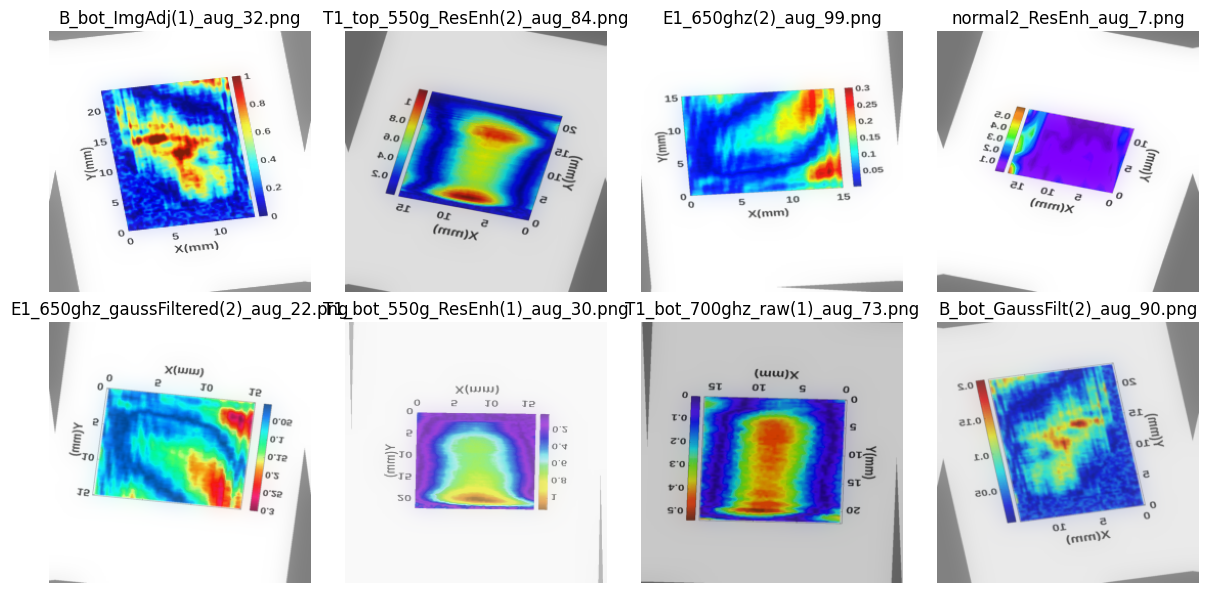

In [ ]:
# visualize the final dataset before splitting

import random

# Define the output directory containing augmented images
augmented_images_dir = '/content/drive/MyDrive/Colab Notebooks/datasets/png_final_augumentated/'


# Load augmented image paths
augmented_image_paths = glob(os.path.join(augmented_images_dir, '*.png'))

# Visualize random samples from the augmented dataset
def visualize_augmented_dataset(image_paths, n=8):
    selected_images = random.sample(image_paths, n)  # Randomly select n images
    plt.figure(figsize=(12, 6))
    for i, img_path in enumerate(selected_images):
        image = Image.open(img_path)
        plt.subplot(2, n // 2, i + 1)
        plt.imshow(image)
        plt.title(os.path.basename(img_path))
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Display 8 random images from the augmented dataset
visualize_augmented_dataset(augmented_image_paths, n=8)


In [ ]:
# setting up the device agnostic code
device = "cuda"if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
from sklearn.model_selection import train_test_split

# get all image paths
image_paths = glob(os.path.join(augmented_images_dir, '*.png'))

# Split the dataset into training, validation, and test sets
train_paths, temp_paths = train_test_split(image_paths, test_size=0.3, random_state=42)
val_paths, test_paths = train_test_split(temp_paths, test_size=0.35, random_state=42)

print(f"Training set size: {len(train_paths)}")
print(f"Validation set size: {len(val_paths)}")
print(f"Test set size: {len(test_paths)}")
print(f"path of training set is {train_paths}")
print(f"path of validation set is {val_paths}")
print(f"path of test set is {test_paths}")


Training set size: 15330
Validation set size: 4270
Test set size: 2300
path of training set is ['/content/drive/MyDrive/Colab Notebooks/datasets/png_final_augumentated/T1_top650ghz_raw_aug_88.png', '/content/drive/MyDrive/Colab Notebooks/datasets/png_final_augumentated/normal1_raw_aug_81.png', '/content/drive/MyDrive/Colab Notebooks/datasets/png_final_augumentated/BB_top_ImgAdj_aug_20.png', '/content/drive/MyDrive/Colab Notebooks/datasets/png_final_augumentated/Can2_GF_aug_10.png', '/content/drive/MyDrive/Colab Notebooks/datasets/png_final_augumentated/C_top_raw(2)_aug_56.png', '/content/drive/MyDrive/Colab Notebooks/datasets/png_final_augumentated/normal1_ScAdj(1)_aug_28.png', '/content/drive/MyDrive/Colab Notebooks/datasets/png_final_augumentated/T1_top_700ghz_ResEnh(1)_aug_84.png', '/content/drive/MyDrive/Colab Notebooks/datasets/png_final_augumentated/T1_top_550g_ResEnh(1)_aug_56.png', '/content/drive/MyDrive/Colab Notebooks/datasets/png_final_augumentated/T1_bot_700ghz_final(2)_au

Visualizing Training Set:


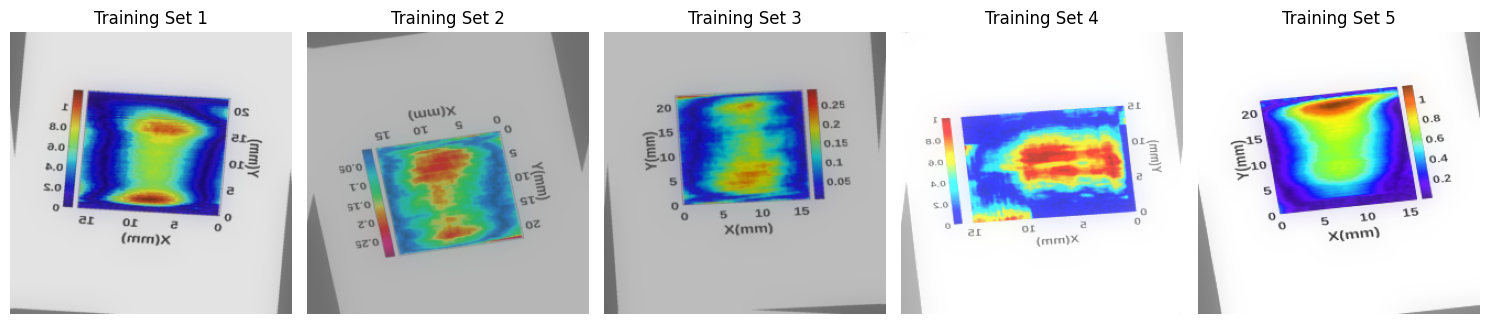

Visualizing Validation Set:


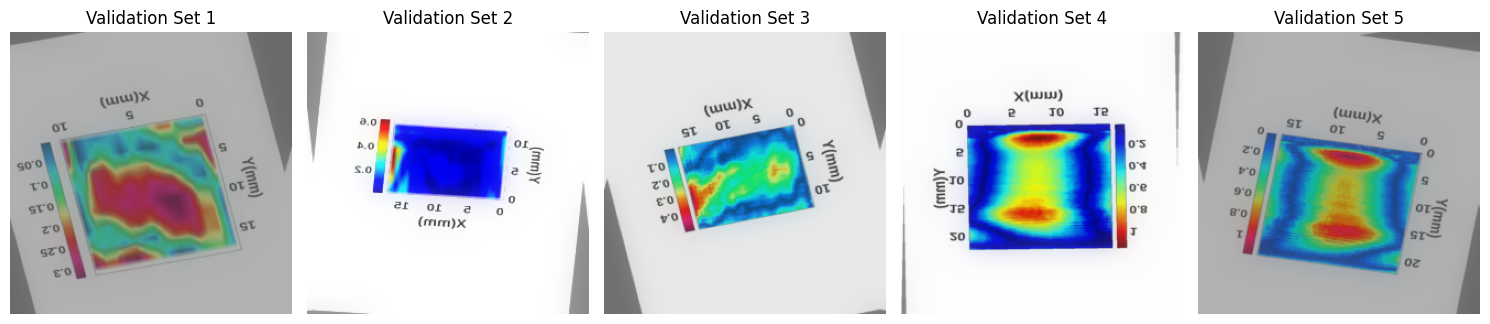

Visualizing Test Set:


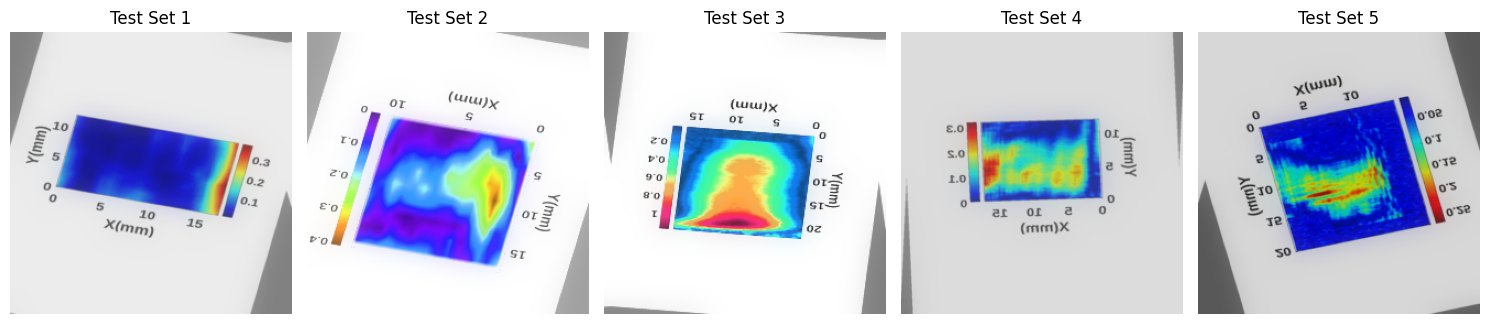

In [ ]:

def visualize_images(image_paths, title, n=5):

    plt.figure(figsize=(15, 5))
    selected_images = random.sample(image_paths, n)
    for i, img_path in enumerate(selected_images):
        img = Image.open(img_path)
        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.title(f"{title} {i + 1}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Visualize 5 images from each set
print("Visualizing Training Set:")
visualize_images(train_paths, "Training Set", n=5)

print("Visualizing Validation Set:")
visualize_images(val_paths, "Validation Set", n=5)

print("Visualizing Test Set:")
visualize_images(test_paths, "Test Set", n=5)


In [ ]:
# #maskng of images
# import cv2
# import numpy as np
# import os
# from glob import glob

# # Directories
# image_dir = '/content/drive/MyDrive/Colab Notebooks/datasets/png_final_augumentated/'
# mask_dir = '/content/drive/MyDrive/Colab Notebooks/datasets/png_final_augumentated_masks/'
# os.makedirs(mask_dir, exist_ok=True)

# def create_center_focused_mask(image_path, output_dir, center_weight=0.7, dilation_iter=3):
#     """
#     Generate a binary mask with a strong focus on central regions.

#     Args:
#         image_path (str): Path to the input image.
#         output_dir (str): Directory to save the generated mask.
#         center_weight (float): Proportion of mask intensity focused on the center.
#         dilation_iter (int): Number of dilation iterations to expand the mask.
#     """
#     # Load the image
#     image = cv2.imread(image_path)
#     image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

#     # Define red color range in HSV
#     lower_red1 = np.array([0, 40, 40])   # Lower range for red
#     upper_red1 = np.array([15, 255, 255])
#     lower_red2 = np.array([165, 40, 40]) # Upper range for red
#     upper_red2 = np.array([180, 255, 255])

#     # Create masks for red regions
#     mask1 = cv2.inRange(image_hsv, lower_red1, upper_red1)
#     mask2 = cv2.inRange(image_hsv, lower_red2, upper_red2)
#     red_mask = cv2.bitwise_or(mask1, mask2)

#     # Apply Gaussian blur
#     red_mask = cv2.GaussianBlur(red_mask, (5, 5), 0)

#     # Dilate the mask to expand regions
#     kernel = np.ones((3, 3), np.uint8)
#     red_mask = cv2.dilate(red_mask, kernel, iterations=dilation_iter)

#     # Create a center weighting mask
#     height, width = red_mask.shape
#     center_weighting = np.zeros_like(red_mask, dtype=np.float32)
#     cv2.circle(center_weighting, (width // 2, height // 2), min(height, width) // 4, 1, -1)  # Add circle focus
#     center_weighting = cv2.GaussianBlur(center_weighting, (31, 31), 0)  # Smooth transition

#     # Blend red mask with center weighting
#     focused_mask = (center_weight * center_weighting * red_mask).astype(np.uint8)

#     # Threshold to keep only significant areas
#     _, focused_mask = cv2.threshold(focused_mask, 50, 255, cv2.THRESH_BINARY)

#     # Save the mask
#     mask_name = os.path.basename(image_path).replace('.png', '_mask.png')
#     cv2.imwrite(os.path.join(output_dir, mask_name), focused_mask)

# # Generate masks for all images
# image_paths = glob(os.path.join(image_dir, '*.png'))
# for img_path in image_paths:
#     create_center_focused_mask(img_path, mask_dir, center_weight=0.7, dilation_iter=2)

# print(f"Center-focused masks generated and saved to: {mask_dir}")


Center-focused masks generated and saved to: /content/drive/MyDrive/Colab Notebooks/datasets/png_final_augumentated_masks/


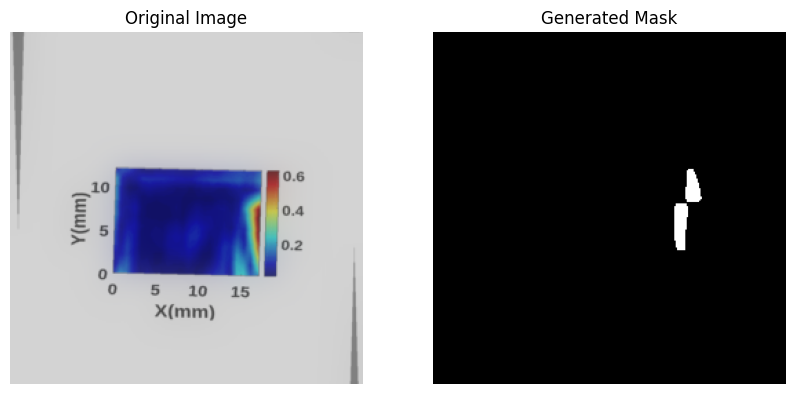

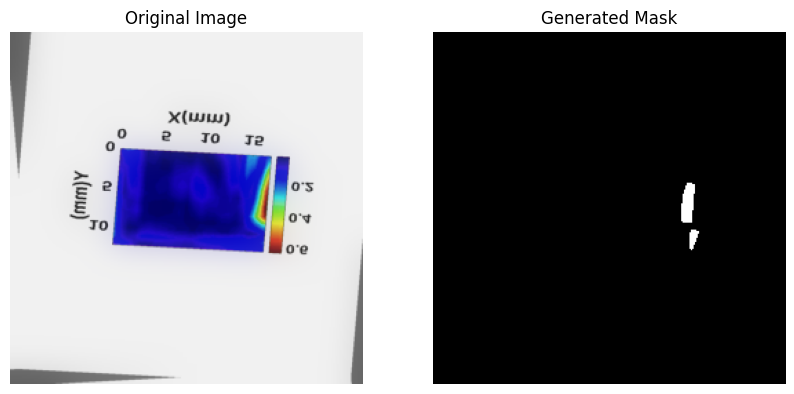

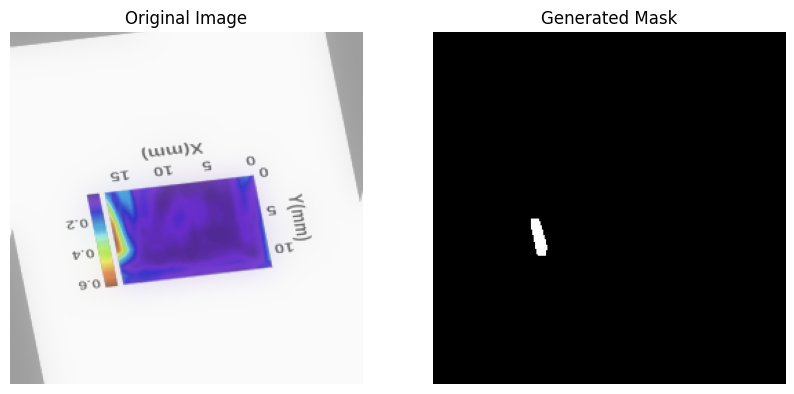

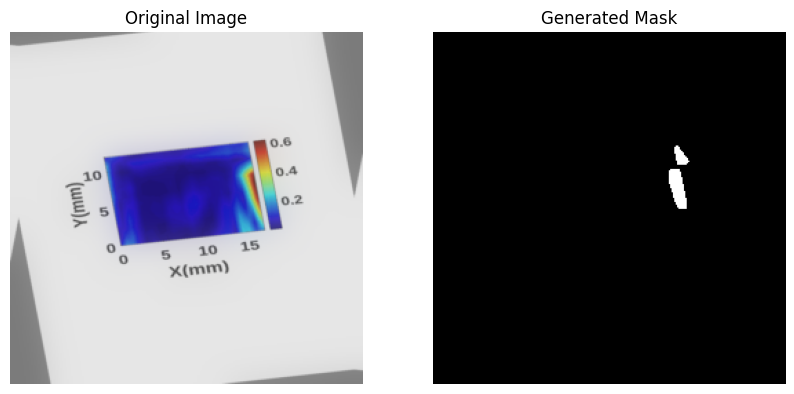

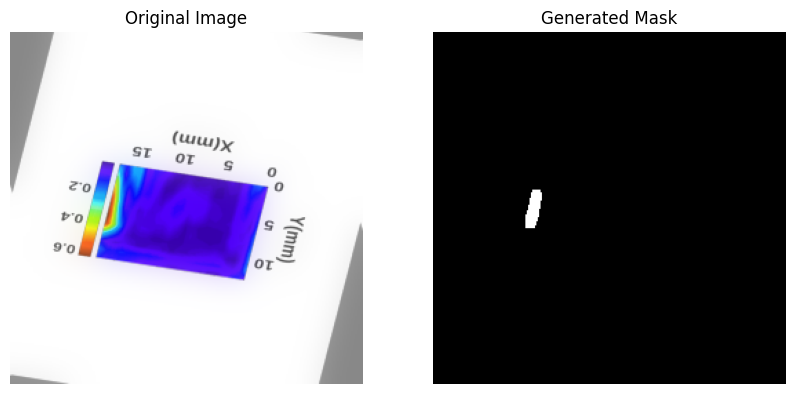

In [ ]:
import cv2
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt
image_dir = '/content/drive/MyDrive/Colab Notebooks/datasets/png_final_augumentated/'
mask_dir = '/content/drive/MyDrive/Colab Notebooks/datasets/png_final_augumentated_masks/'
def visualize_cancer_masks(image_dir, mask_dir, n=5):
    """
    Visualize images and their corresponding cancer masks.

    Args:
        image_dir (str): Directory containing the input images.
        mask_dir (str): Directory containing the generated masks.
        n (int): Number of images and masks to visualize.
    """
    image_paths = glob(os.path.join(image_dir, '*.png'))[:n]

    for img_path in image_paths:
        img = cv2.imread(img_path)
        mask_path = os.path.join(mask_dir, os.path.basename(img_path).replace('.png', '_mask.png'))
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        plt.figure(figsize=(10, 5))

        # Display the image
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title("Original Image")
        plt.axis("off")

        # Display the mask
        plt.subplot(1, 2, 2)
        plt.imshow(mask, cmap='gray')
        plt.title("Generated Mask")
        plt.axis("off")

        plt.show()

# Visualize the results
visualize_cancer_masks(image_dir, mask_dir, n=5)


In [ ]:
def generate_mask_paths(image_paths, mask_dir):
    """
    Generate mask paths corresponding to image paths.

    Args:
        image_paths (list): List of image file paths.
        mask_dir (str): Directory containing the masks.

    Returns:
        list: List of corresponding mask file paths.
    """
    mask_paths = []
    for img_path in image_paths:
        # Replace the image name to match the mask naming convention
        mask_name = os.path.basename(img_path).replace('.png', '_mask.png')
        mask_path = os.path.join(mask_dir, mask_name)
        mask_paths.append(mask_path)
    return mask_paths


In [ ]:
train_mask_paths = generate_mask_paths(train_paths, mask_dir)
val_mask_paths = generate_mask_paths(val_paths, mask_dir)
test_mask_paths = generate_mask_paths(test_paths, mask_dir)
print(len(train_mask_paths))
print(len(val_mask_paths))
print(len(test_mask_paths))


15330
4270
2300


In [ ]:
k = 0
for mask_path in train_mask_paths + val_mask_paths + test_mask_paths:
    if not os.path.exists(mask_path):
        print(f"Missing mask file: {mask_path}")
        k += 1
print(f"Total number of missing mask files: {k}")

Total number of missing mask files: 0


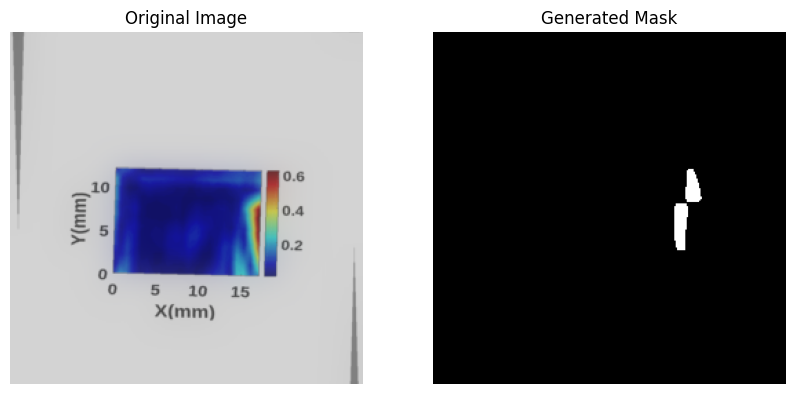

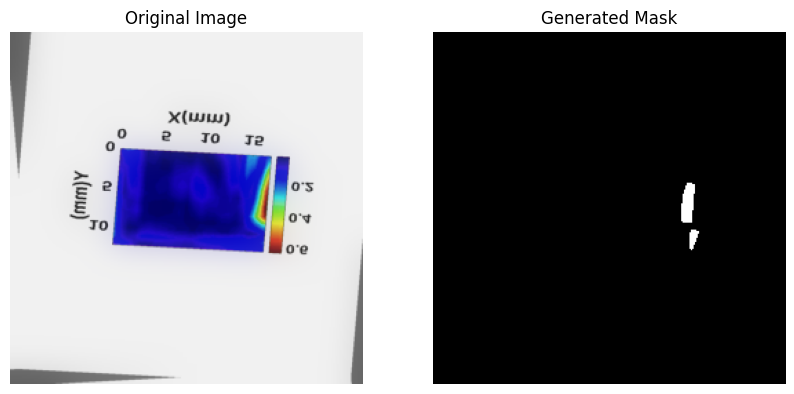

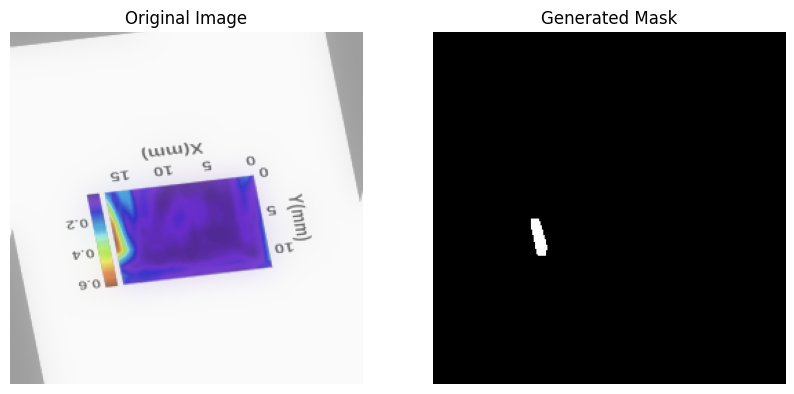

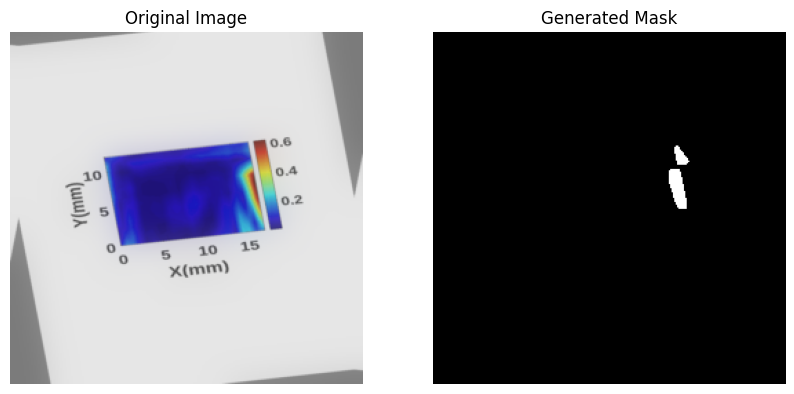

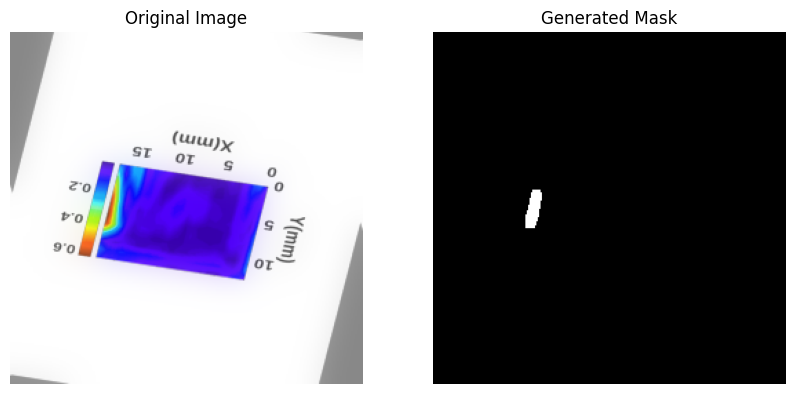

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
from glob import glob

def visualize_cancer_masks(image_dir, mask_dir, n=5):
    """
    Visualize original images and their corresponding cancer masks.

    Args:
        image_dir (str): Directory containing the input images.
        mask_dir (str): Directory containing the generated masks.
        n (int): Number of images and masks to visualize.
    """
    # Get paths for the first n images
    image_paths = glob(os.path.join(image_dir, '*.png'))[:n]

    for img_path in image_paths:
        # Load the image
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Load the corresponding mask
        mask_path = os.path.join(mask_dir, os.path.basename(img_path).replace('.png', '_mask.png'))
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # Display image and mask side by side
        plt.figure(figsize=(10, 5))

        # Original Image
        plt.subplot(1, 2, 1)
        plt.imshow(img)
        plt.title("Original Image")
        plt.axis("off")

        # Generated Mask
        plt.subplot(1, 2, 2)
        plt.imshow(mask, cmap='gray')
        plt.title("Generated Mask")
        plt.axis("off")

        plt.show()

# Visualize masks for 5 random images
visualize_cancer_masks(image_dir, mask_dir, n=5)


In [ ]:
from torch.utils.data import Dataset
from PIL import Image

class SegmentationDataset(Dataset):
    def __init__(self, image_paths, mask_paths, image_transform=None, mask_transform=None):
        """
        Args:
            image_paths (list): List of file paths to the input images.
            mask_paths (list): List of file paths to the corresponding masks.
            image_transform (callable, optional): Transformations to apply to input images.
            mask_transform (callable, optional): Transformations to apply to masks.
        """
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.image_transform = image_transform
        self.mask_transform = mask_transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Load the image
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')

        # Load the mask
        mask_path = self.mask_paths[idx]
        mask = Image.open(mask_path).convert('L')  # Grayscale mask

        # Apply transformations
        if self.image_transform:
            image = self.image_transform(image)
        if self.mask_transform:
            mask = self.mask_transform(mask)

        return image, mask


In [ ]:
train_image_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

val_image_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])


In [ ]:
train_mask_transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize masks to match image size
    transforms.ToTensor()          # Convert masks to tensors
])

val_mask_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])


In [ ]:
train_dataset = SegmentationDataset(train_paths, train_mask_paths,
                                     image_transform=train_image_transform,
                                     mask_transform=train_mask_transform)

val_dataset = SegmentationDataset(val_paths, val_mask_paths,
                                   image_transform=val_image_transform,
                                   mask_transform=val_mask_transform)

test_dataset = SegmentationDataset(test_paths, test_mask_paths,
                                    image_transform=val_image_transform,  # Same as validation
                                    mask_transform=val_mask_transform)
print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

Train dataset size: 15330
Validation dataset size: 4270
Test dataset size: 2300


In [ ]:
class SegmentationDataset(Dataset):
    def __init__(self, image_paths, mask_paths, image_transform=None, mask_transform=None):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.image_transform = image_transform
        self.mask_transform = mask_transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = Image.open(self.image_paths[idx]).convert('RGB')
        mask = Image.open(self.mask_paths[idx]).convert('L')

        if self.image_transform:
            img = self.image_transform(img)
        if self.mask_transform:
            mask = self.mask_transform(mask)

        return img, mask


In [ ]:
from torchvision import transforms
from torch.utils.data import DataLoader

# Define transformations for images and masks
test_image_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

test_mask_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# Define the test dataset
test_dataset = SegmentationDataset(
    test_paths,
    test_mask_paths,
    image_transform=test_image_transform,
    mask_transform=test_mask_transform
)


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

In [ ]:
print(f"Number of batches in test_loader: {len(test_loader)}")
print(f"Number of samples in test_dataset: {len(test_dataset)}")

Number of batches in test_loader: 575
Number of samples in test_dataset: 2300


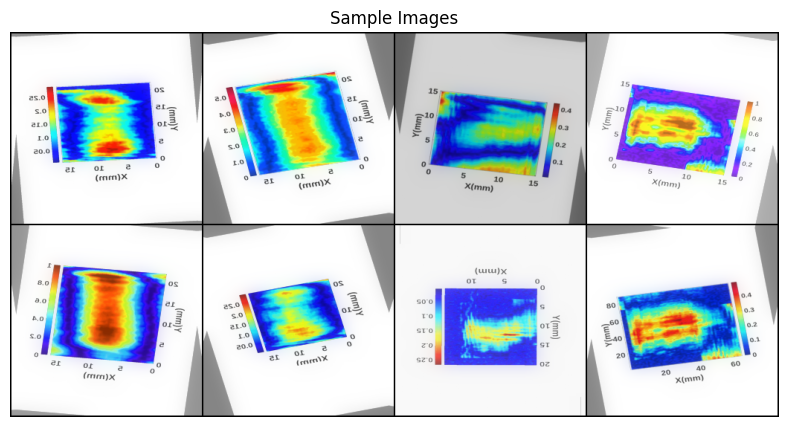

In [ ]:
import matplotlib.pyplot as plt
import torchvision

def visualize_batch(dataloader):
    images, masks = next(iter(dataloader))
    grid = torchvision.utils.make_grid(images[:8], nrow=4, normalize=True)
    plt.figure(figsize=(10, 5))
    plt.imshow(grid.permute(1, 2, 0))
    plt.title("Sample Images")
    plt.axis("off")
    plt.show()

visualize_batch(DataLoader(train_dataset, batch_size=8, shuffle=True))


In [ ]:
def visualize_dataloader(dataloader):
    images, masks = next(iter(dataloader))
    grid = torchvision.utils.make_grid(images[:8], nrow=4, normalize=True)
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 1, 1)
    plt.imshow(grid.permute(1, 2, 0))
    plt.title("Sample Images")
    plt.axis("off")

    plt.subplot(2, 1, 2)
    for i in range(8):
        plt.subplot(2, 8, i + 9)
        plt.imshow(masks[i].squeeze().cpu(), cmap="gray")
        plt.axis("off")
    plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class UNet(nn.Module):
    def __init__(self, in_channels=3, out_channels=1):
        super(UNet, self).__init__()
        # Encoder
        self.enc1 = self.conv_block(in_channels, 64)
        self.enc2 = self.conv_block(64, 128)
        self.enc3 = self.conv_block(128, 256)
        self.enc4 = self.conv_block(256, 512)

        # Bottleneck with Atrous Convolutions
        self.bottleneck = nn.Sequential(
            nn.Conv2d(512, 1024, kernel_size=3, padding=1, dilation=1),
            nn.BatchNorm2d(1024),
            nn.LeakyReLU(inplace=True),
            nn.Conv2d(1024, 1024, kernel_size=3, padding=2, dilation=2),
            nn.BatchNorm2d(1024),
            nn.LeakyReLU(inplace=True),
            nn.Dropout(0.5)
        )

        # Decoder
        self.dec4 = self.up_conv_block(1024, 512)
        self.dec3 = self.up_conv_block(1024, 256)  # Input: 512 (decoder) + 512 (skip connection)
        self.dec2 = self.up_conv_block(512, 128)   # Input: 256 (decoder) + 256 (skip connection)
        self.dec1 = self.up_conv_block(256, 64)    # Input: 128 (decoder) + 128 (skip connection)

        # Final output
        self.final = nn.Conv2d(128, out_channels, kernel_size=1)  # Input: 64 (decoder) + 64 (skip connection)

    def conv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.LeakyReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.LeakyReLU(inplace=True),
            nn.Dropout(0.3)
        )

    def up_conv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2),
            nn.BatchNorm2d(out_channels),
            nn.LeakyReLU(inplace=True)
        )

    def forward(self, x):
        # Encoder
        enc1 = self.enc1(x)                           # Output: 64 channels
        enc2 = self.enc2(F.max_pool2d(enc1, 2))       # Output: 128 channels
        enc3 = self.enc3(F.max_pool2d(enc2, 2))       # Output: 256 channels
        enc4 = self.enc4(F.max_pool2d(enc3, 2))       # Output: 512 channels

        # Bottleneck
        bottleneck = self.bottleneck(F.max_pool2d(enc4, 2))  # Output: 1024 channels

        # Decoder with skip connections
        dec4 = self.dec4(bottleneck)                 # Output: 512 channels
        dec4 = torch.cat((dec4, enc4), dim=1)        # Concatenate: 512 + 512 = 1024 channels
        dec3 = self.dec3(dec4)                       # Output: 256 channels
        dec3 = torch.cat((dec3, enc3), dim=1)        # Concatenate: 256 + 256 = 512 channels
        dec2 = self.dec2(dec3)                       # Output: 128 channels
        dec2 = torch.cat((dec2, enc2), dim=1)        # Concatenate: 128 + 128 = 256 channels
        dec1 = self.dec1(dec2)                       # Output: 64 channels
        dec1 = torch.cat((dec1, enc1), dim=1)        # Concatenate: 64 + 64 = 128 channels

        # Final segmentation map
        out = self.final(dec1)                       # Output: 1 channel (binary segmentation)
        return out


In [ ]:
# Create a U-Net model instance
model = UNet(in_channels=3, out_channels=1).to(device)

# Test with a sample input
sample_input = torch.randn(1, 3, 256, 256).to(device)
sample_output = model(sample_input)
print("Output shape:", sample_output.shape)  # Should be (1, 1, 256, 256)


Output shape: torch.Size([1, 1, 256, 256])


In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.5)

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from tqdm import tqdm  # For progress bars

# Loss Function (BCE + Dice + IoU)
class DiceLoss(nn.Module):
    def __init__(self):
        super(DiceLoss, self).__init__()

    def forward(self, preds, targets, smooth=1):
        preds = torch.sigmoid(preds)  # Convert logits to probabilities
        intersection = (preds * targets).sum()
        dice = (2. * intersection + smooth) / (preds.sum() + targets.sum() + smooth)
        return 1 - dice

def iou_loss(preds, targets, smooth=1):
    """
    Compute IoU Loss.
    Args:
        preds: Predicted probabilities (after sigmoid).
        targets: Ground truth masks.
        smooth: Smoothing factor to avoid division by zero.
    Returns:
        IoU Loss value.
    """
    preds = torch.sigmoid(preds)  # Ensure predictions are probabilities
    intersection = (preds * targets).sum(dim=(1, 2, 3))  # Element-wise multiplication
    union = preds.sum(dim=(1, 2, 3)) + targets.sum(dim=(1, 2, 3)) - intersection
    iou = (intersection + smooth) / (union + smooth)
    return 1 - iou.mean()

def combined_loss_with_iou(preds, targets, alpha=0.4, beta=0.4):
    """
    Combines BCE Loss, Dice Loss, and IoU Loss for better segmentation.
    Args:
        preds: Predicted tensor (logits).
        targets: Ground truth tensor.
        alpha: Weight for BCE loss.
        beta: Weight for Dice loss.
    """
    bce = nn.BCEWithLogitsLoss()(preds, targets)
    dice = DiceLoss()(preds, targets)
    iou = iou_loss(preds, targets)
    return alpha * bce + beta * dice + (1 - alpha - beta) * iou

# Training Loop
def train_model(model, train_loader, val_loader, optimizer, num_epochs, device, patience=5):
    """
    Trains the U-Net model and evaluates on validation data with early stopping and a learning rate scheduler.

    Args:
        model: The U-Net model.
        train_loader: DataLoader for training data.
        val_loader: DataLoader for validation data.
        optimizer: Optimizer for model training.
        num_epochs: Number of epochs.
        device: Device to run the training (e.g., 'cuda' or 'cpu').
        patience: Number of epochs to wait for improvement in validation loss before stopping.
    """
    # Define the learning rate scheduler
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.5, verbose=True)

    model = model.to(device)
    best_val_loss = float('inf')  # Track the best validation loss
    early_stop_counter = 0  # Counter to track patience

    for epoch in range(1, num_epochs + 1):
        # Training Phase
        model.train()
        train_loss = 0
        for images, masks in tqdm(train_loader, desc=f"Epoch {epoch}/{num_epochs} - Training"):
            images, masks = images.to(device), masks.to(device)

            # Forward pass
            preds = model(images)
            loss = combined_loss_with_iou(preds, masks)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        train_loss /= len(train_loader)

        # Validation Phase
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for images, masks in tqdm(val_loader, desc=f"Epoch {epoch}/{num_epochs} - Validation"):
                images, masks = images.to(device), masks.to(device)
                preds = model(images)
                val_loss += combined_loss_with_iou(preds, masks).item()

        val_loss /= len(val_loader)

        print(f"Epoch {epoch}/{num_epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        # Step the scheduler
        scheduler.step(val_loss)

        # Check for improvement
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), "best_unet_model.pth")
            print(f"Best model saved with Val Loss: {val_loss:.4f}")
            early_stop_counter = 0  # Reset counter if validation loss improves
        else:
            early_stop_counter += 1
            print(f"No improvement in Val Loss for {early_stop_counter} epoch(s).")

        # Early stopping check
        if early_stop_counter >= patience:
            print("Early stopping triggered.")
            break

    print("Training complete. Best model saved.")


In [ ]:
# Initialize the model, optimizer, and other components
device = "cuda" if torch.cuda.is_available() else "cpu"
model = UNet(in_channels=3, out_channels=1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Assuming train_loader and val_loader are defined
train_model(model, train_loader, val_loader, optimizer, num_epochs=20, device=device, patience=5)



Epoch 1/20 - Validation: 100%|██████████| 1068/1068 [01:27<00:00, 12.25it/s]


Epoch 1/20: Train Loss: 0.4517, Val Loss: 0.2897
Best model saved with Val Loss: 0.2897


Epoch 2/20 - Validation: 100%|██████████| 1068/1068 [01:27<00:00, 12.20it/s]


Epoch 2/20: Train Loss: 0.3849, Val Loss: 0.1672
Best model saved with Val Loss: 0.1672


Epoch 3/20 - Validation: 100%|██████████| 1068/1068 [01:25<00:00, 12.49it/s]


Epoch 3/20: Train Loss: 0.3697, Val Loss: 0.1318
Best model saved with Val Loss: 0.1318


Epoch 4/20 - Validation: 100%|██████████| 1068/1068 [01:22<00:00, 12.87it/s]


Epoch 4/20: Train Loss: 0.3656, Val Loss: 0.1381
No improvement in Val Loss for 1 epoch(s).


Epoch 5/20 - Validation: 100%|██████████| 1068/1068 [01:23<00:00, 12.72it/s]


Epoch 5/20: Train Loss: 0.3616, Val Loss: 0.1337
No improvement in Val Loss for 2 epoch(s).


Epoch 6/20 - Validation: 100%|██████████| 1068/1068 [01:23<00:00, 12.81it/s]


Epoch 6/20: Train Loss: 0.3608, Val Loss: 0.1224
Best model saved with Val Loss: 0.1224


Epoch 7/20 - Validation: 100%|██████████| 1068/1068 [01:22<00:00, 12.91it/s]


Epoch 7/20: Train Loss: 0.3561, Val Loss: 0.1631
No improvement in Val Loss for 1 epoch(s).


Epoch 8/20 - Validation: 100%|██████████| 1068/1068 [01:22<00:00, 12.92it/s]


Epoch 8/20: Train Loss: 0.3561, Val Loss: 0.1354
No improvement in Val Loss for 2 epoch(s).


Epoch 9/20 - Validation: 100%|██████████| 1068/1068 [01:22<00:00, 12.92it/s]


Epoch 9/20: Train Loss: 0.3525, Val Loss: 0.1281
No improvement in Val Loss for 3 epoch(s).


Epoch 10/20 - Validation: 100%|██████████| 1068/1068 [01:25<00:00, 12.44it/s]


Epoch 10/20: Train Loss: 0.3530, Val Loss: 0.1159
Best model saved with Val Loss: 0.1159


Epoch 11/20 - Validation: 100%|██████████| 1068/1068 [01:27<00:00, 12.26it/s]


Epoch 11/20: Train Loss: 0.3501, Val Loss: 0.1182
No improvement in Val Loss for 1 epoch(s).


Epoch 12/20 - Training:  53%|█████▎    | 2035/3833 [06:22<05:38,  5.32it/s]


KeyboardInterrupt: 

In [ ]:
# dice coeffecient and iou score calculation
def calculate_dice(preds, targets, smooth=1):
    """
    Calculate Dice Coefficient.
    Args:
        preds: Predicted tensor (after sigmoid, thresholded).
        targets: Ground truth tensor.
        smooth: Smoothing factor to avoid division by zero.
    Returns:
        Dice Coefficient.
    """
    preds = (preds > 0.5).float()  # Apply threshold to predictions
    intersection = (preds * targets).sum(dim=(1, 2, 3))  # Element-wise multiplication
    union = preds.sum(dim=(1, 2, 3)) + targets.sum(dim=(1, 2, 3))
    dice = (2. * intersection + smooth) / (union + smooth)
    return dice.mean().item()


In [ ]:
def calculate_iou(preds, targets, smooth=1):
    """
    Calculate IoU Score.
    Args:
        preds: Predicted tensor (after sigmoid, thresholded).
        targets: Ground truth tensor.
        smooth: Smoothing factor to avoid division by zero.
    Returns:
        IoU score.
    """
    preds = (preds > 0.5).float()  # Apply threshold to predictions
    intersection = (preds * targets).sum(dim=(1, 2, 3))  # Element-wise multiplication
    union = preds.sum(dim=(1, 2, 3)) + targets.sum(dim=(1, 2, 3)) - intersection
    iou = (intersection + smooth) / (union + smooth)
    return iou.mean().item()


In [ ]:
import torch
from tqdm import tqdm

def evaluate_model(model, val_loader, device):
    """
    Evaluate the model and calculate Dice Coefficient and IoU.
    Args:
        model: Trained model.
        val_loader: DataLoader for validation data.
        device: Device to run the evaluation (e.g., 'cuda' or 'cpu').
    Returns:
        Average Dice Coefficient and IoU score.
    """
    model.eval()
    dice_coeff = 0
    iou_score = 0

    with torch.no_grad():
        for images, masks in tqdm(val_loader, desc="Evaluating Model"):
            images, masks = images.to(device), masks.to(device)

            # Forward pass
            preds = model(images)
            preds = torch.sigmoid(preds)  # Convert logits to probabilities

            # Calculate metrics
            dice_coeff += calculate_dice(preds, masks)
            iou_score += calculate_iou(preds, masks)

    # Average metrics across the dataset
    dice_coeff /= len(val_loader)
    iou_score /= len(val_loader)
    return dice_coeff, iou_score


In [ ]:
# Load the best model
model.load_state_dict(torch.load("best_unet_model.pth"))
model.to(device)

# Evaluate the model
dice, iou = evaluate_model(model, val_loader, device)
print(f"Final Dice Coefficient: {dice:.4f}, Final IoU Score: {iou:.4f}")


Evaluating Model: 100%|██████████| 1068/1068 [01:26<00:00, 12.29it/s]

Final Dice Coefficient: 0.8132, Final IoU Score: 0.7494


In [ ]:
def visualize_segmentation(image, mask, prediction, idx):
    """
    Visualizes the original image, ground truth mask, and predicted segmentation.
    Args:
        image: Original input image (tensor).
        mask: Ground truth mask (tensor).
        prediction: Predicted mask (tensor).
        idx: Index of the image for identification (e.g., saving).
    """
    # Convert tensors to numpy arrays for visualization
    image = image.cpu().permute(1, 2, 0).numpy()  # Convert CHW to HWC (for RGB)
    mask = mask.cpu().squeeze(0).numpy()  # Remove channel dimension for grayscale
    prediction = prediction.cpu().squeeze(0).numpy()  # Remove channel dimension for grayscale

    # Clip image values to [0, 1] if required
    image = (image - image.min()) / (image.max() - image.min())  # Normalize to 0-1 if needed

    # Plot the results
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap="gray" if image.shape[-1] == 1 else None)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Ground Truth Mask")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(prediction, cmap='gray')
    plt.title("Predicted Mask")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


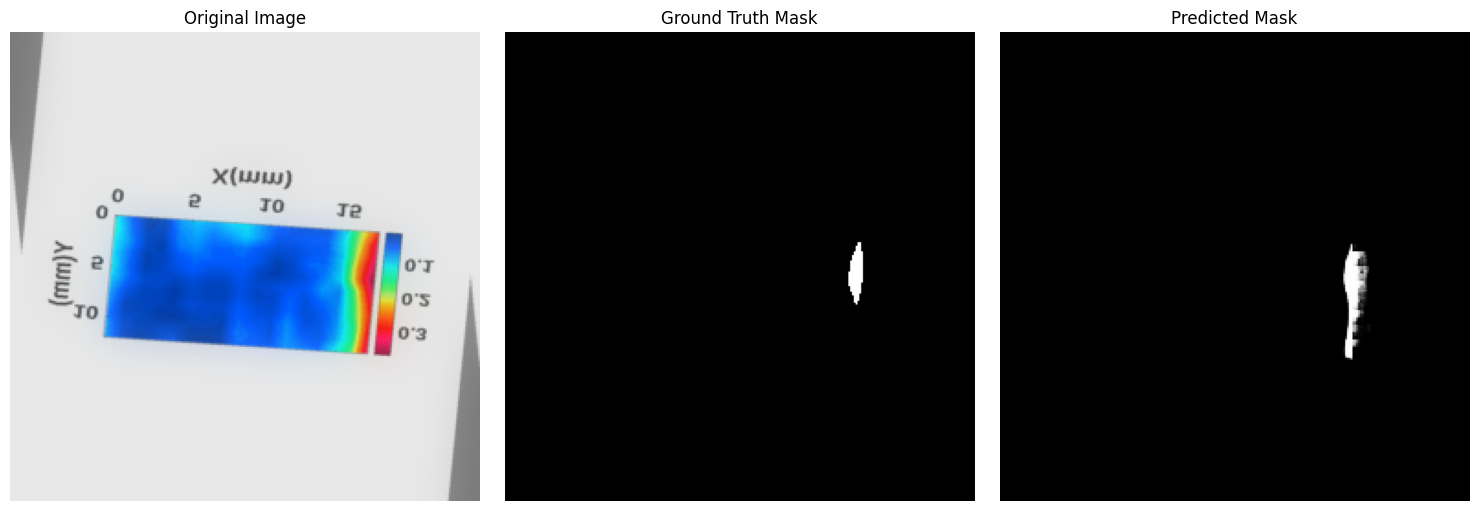

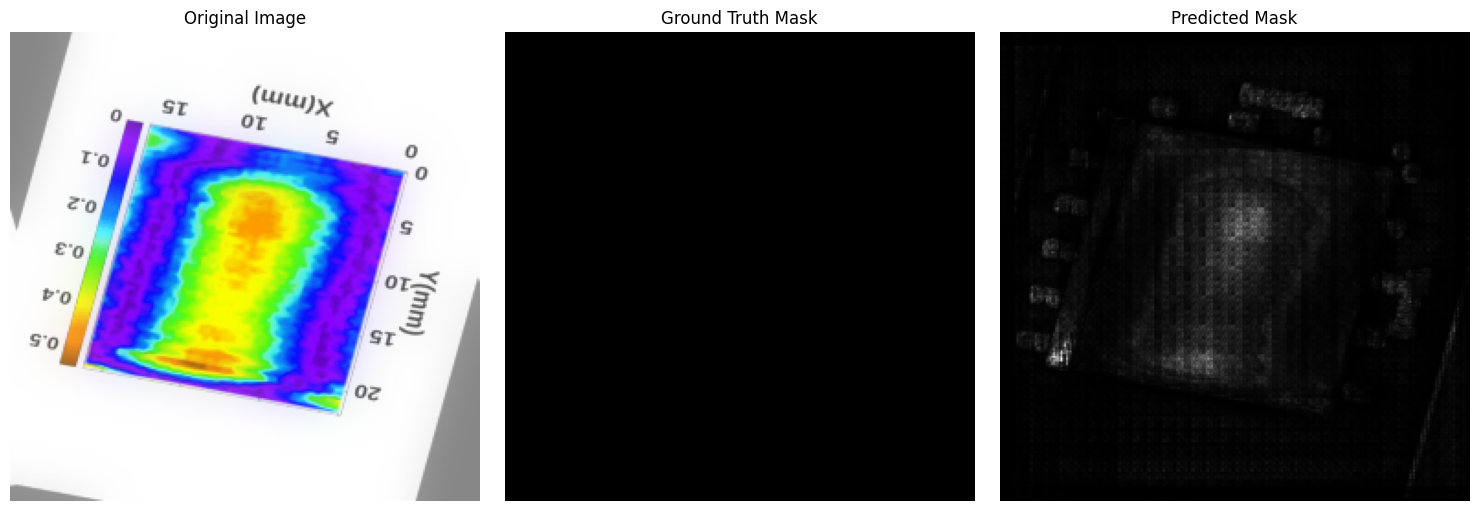

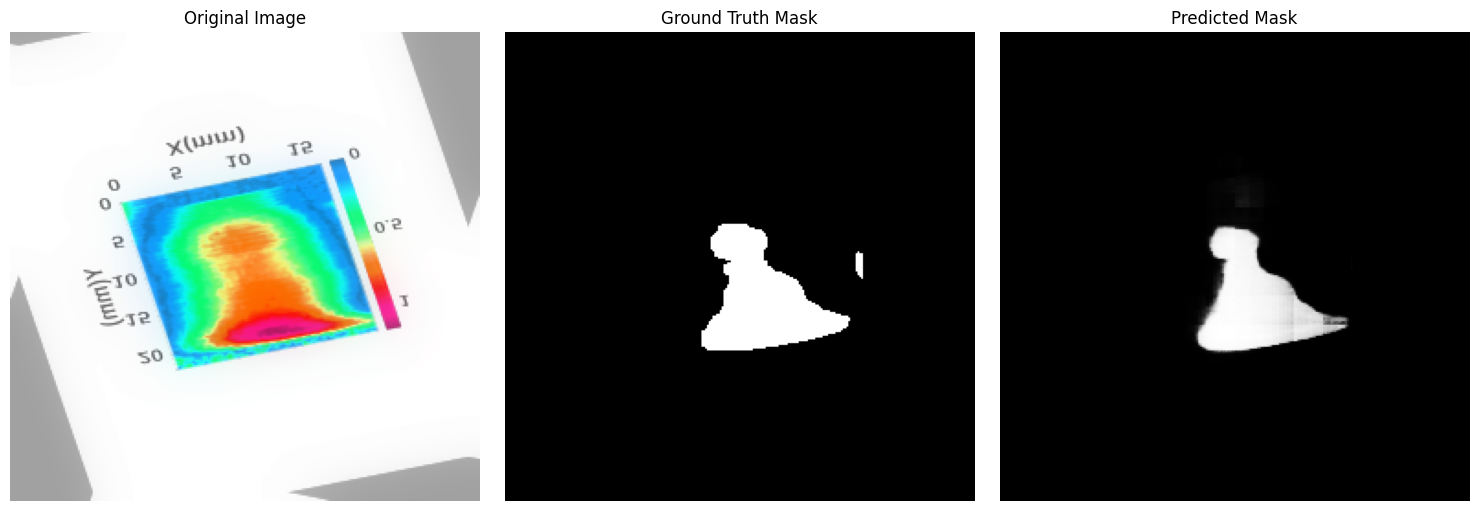

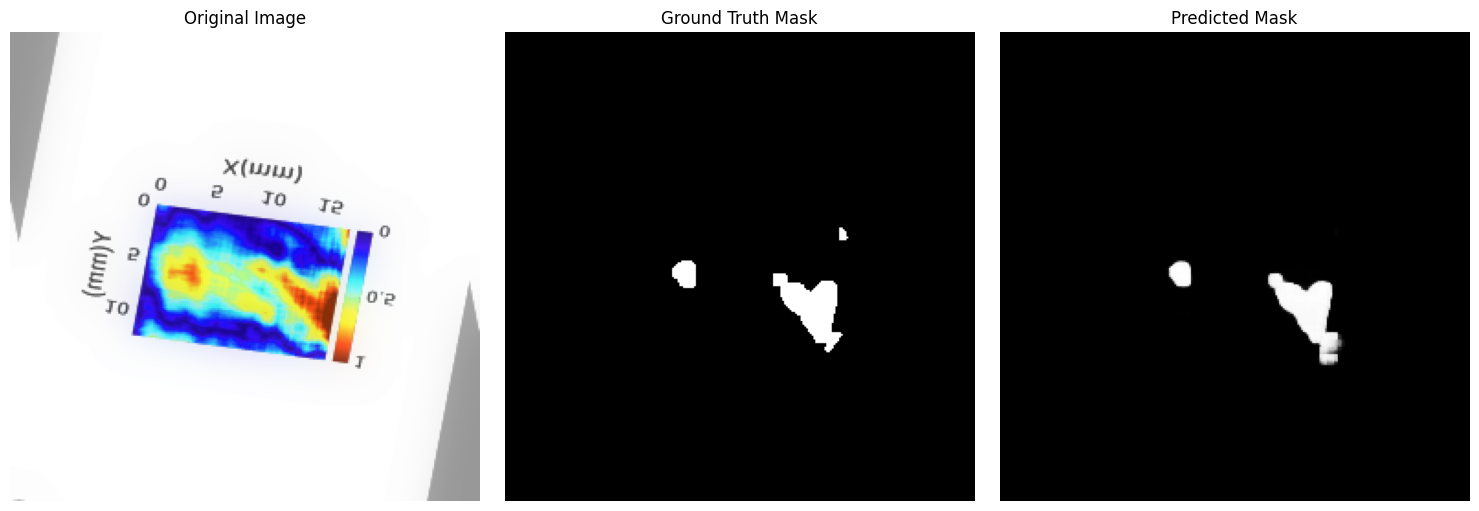

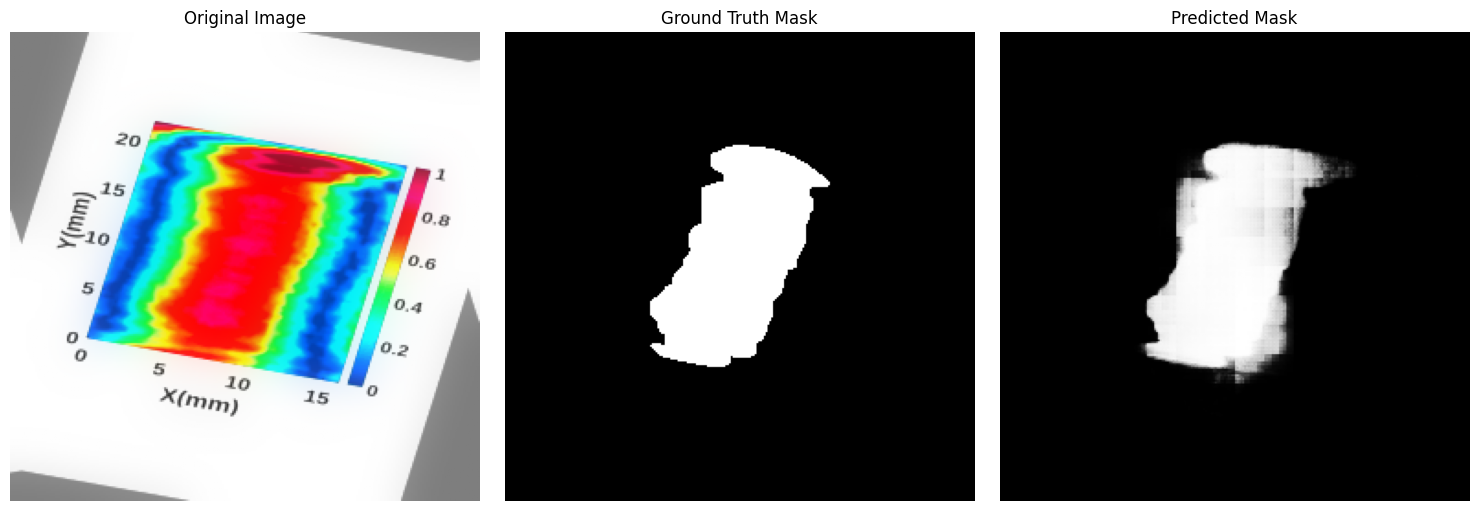

Final Dice Coefficient: 0.0015, Final IoU Score: 0.0014


In [ ]:
def visualize_segmentation_results(model, val_loader, device, visualize=False, max_visualizations=5):
    """
    Visualizes segmentation results for a given number of images.

    Args:
        model (torch.nn.Module): Trained model.
        val_loader (DataLoader): DataLoader for validation data.
        device (str): Device to run the model on ('cuda' or 'cpu').
        visualize (bool, optional): Whether to display the visualizations. Defaults to False.
        max_visualizations (int, optional): Maximum number of visualizations to display. Defaults to 5.
    """
    model.eval()  # Set model to evaluation mode
    dice_coeff = 0
    iou_score = 0
    num_visualized = 0

    with torch.no_grad():  # Disable gradient calculations
        for idx, (images, masks) in enumerate(val_loader):
            images, masks = images.to(device), masks.to(device)
            preds = model(images)
            preds = torch.sigmoid(preds)  # Apply sigmoid to get probabilities

            # Calculate and accumulate metrics
            dice_coeff += calculate_dice(preds, masks)
            iou_score += calculate_iou(preds, masks)

            # Visualize if requested
            if visualize and num_visualized < max_visualizations:
                for i in range(images.shape[0]):
                    visualize_segmentation(images[i], masks[i], preds[i], idx * images.shape[0] + i)  # Call your original visualization function
                    num_visualized += 1
                    if num_visualized >= max_visualizations:
                        break

            if num_visualized >= max_visualizations:
                break

    # Average metrics across the dataset
    dice_coeff /= len(val_loader)
    iou_score /= len(val_loader)
    return dice_coeff, iou_score

# Example usage:
dice, iou = visualize_segmentation_results(model, val_loader, device, visualize=True, max_visualizations=5)
print(f"Final Dice Coefficient: {dice:.4f}, Final IoU Score: {iou:.4f}")

In [ ]:
# Load the trained model
model.load_state_dict(torch.load("best_unet_model.pth"))
model.to(device)
model.eval()  # Set the model to evaluation mode


UNet(
  (enc1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01, inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.01, inplace=True)
    (6): Dropout(p=0.3, inplace=False)
  )
  (enc2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01, inplace=True)
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.01, inplace=True)
    (6): Dropout(p=0.3, inplace

In [ ]:
from torch.utils.data import DataLoader

# Assuming you have a test dataset class
# Original: test_dataset = YourTestDataset(transform=test_transforms)  # Apply necessary preprocessing
test_dataset = SegmentationDataset(test_paths, test_mask_paths,  # Use the existing SegmentationDataset
                                    image_transform=test_image_transform,
                                    mask_transform=test_mask_transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [ ]:
def calculate_dice(preds, targets, smooth=1):
    preds = (preds > 0.5).float()  # Threshold predictions
    intersection = (preds * targets).sum(dim=(1, 2, 3))
    union = preds.sum(dim=(1, 2, 3)) + targets.sum(dim=(1, 2, 3))
    dice = (2. * intersection + smooth) / (union + smooth)
    return dice.mean().item()

def calculate_iou(preds, targets, smooth=1):
    preds = (preds > 0.5).float()  # Threshold predictions
    intersection = (preds * targets).sum(dim=(1, 2, 3))
    union = preds.sum(dim=(1, 2, 3)) + targets.sum(dim=(1, 2, 3)) - intersection
    iou = (intersection + smooth) / (union + smooth)
    return iou.mean().item()


In [ ]:
from tqdm import tqdm

def test_model(model, test_loader, device):
    model.eval()
    dice_coeff = 0
    iou_score = 0
    count = 0

    with torch.no_grad():
        for images, masks in tqdm(test_loader, desc="Testing"):
            images, masks = images.to(device), masks.to(device)

            # Forward pass
            preds = model(images)
            preds = torch.sigmoid(preds)  # Apply sigmoid to get probabilities

            # Calculate metrics
            dice_coeff += calculate_dice(preds, masks)
            iou_score += calculate_iou(preds, masks)
            count += 1

    # Average metrics
    dice_coeff /= count
    iou_score /= count
    return dice_coeff, iou_score

# Run the testing function
dice, iou = test_model(model, test_loader, device)
print(f"Test Dice Coefficient: {dice:.4f}, Test IoU Score: {iou:.4f}")


Testing: 100%|██████████| 2300/2300 [00:51<00:00, 44.47it/s]

Test Dice Coefficient: 0.8166, Test IoU Score: 0.7534


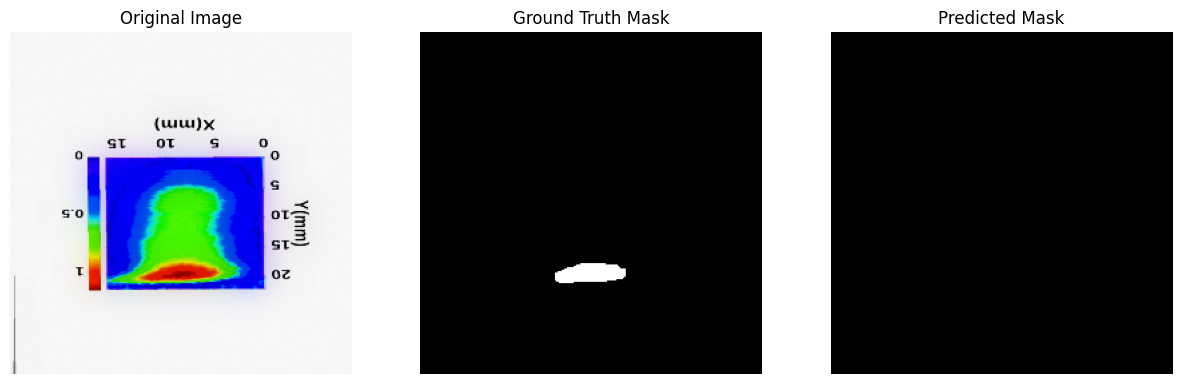

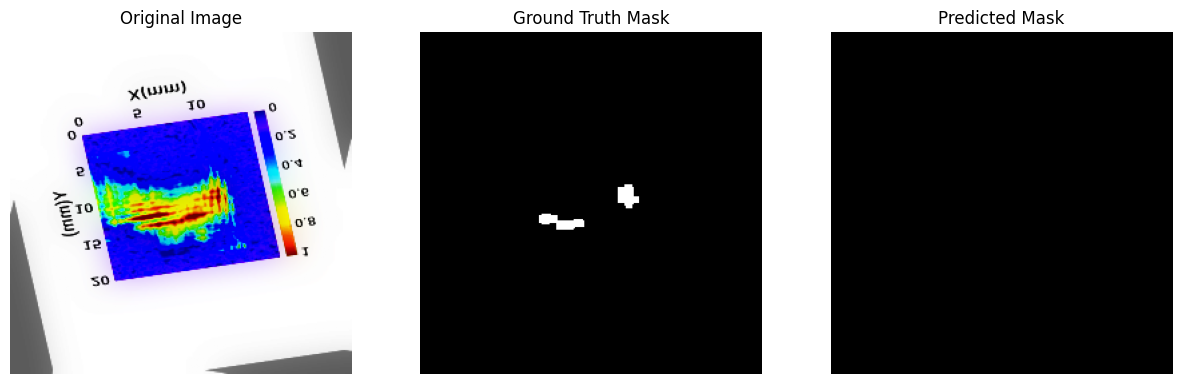

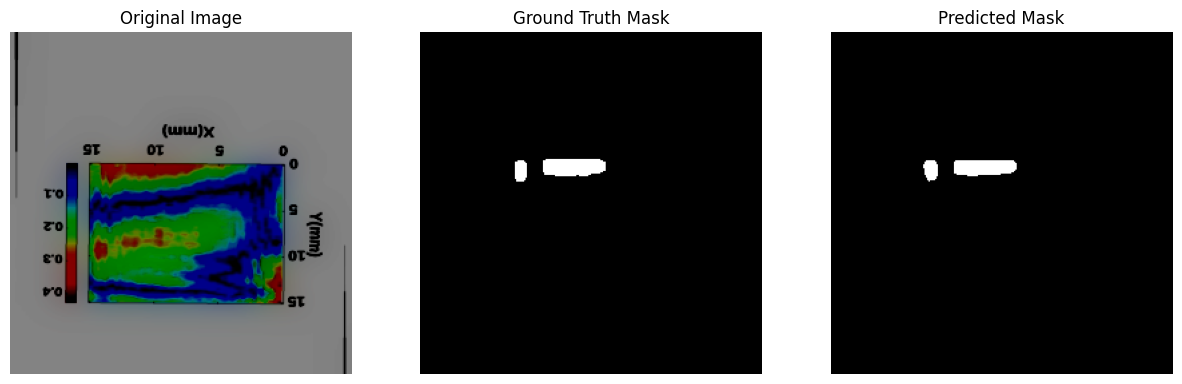

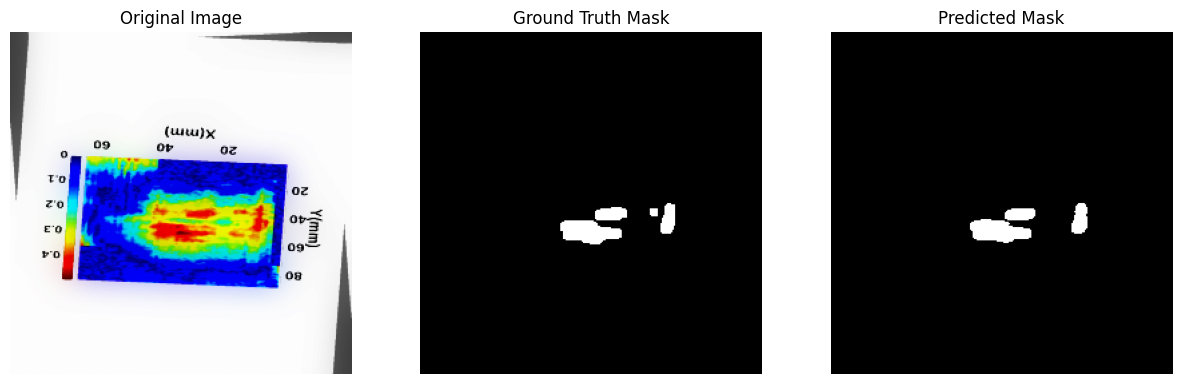

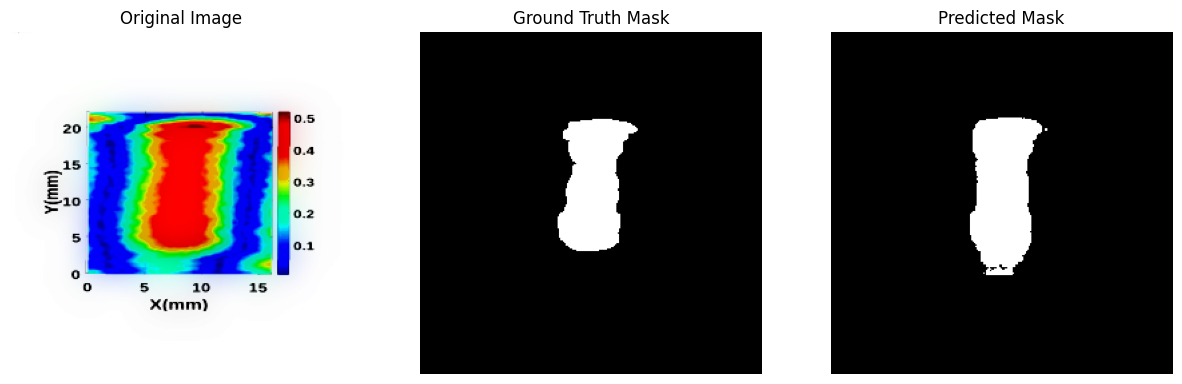

In [ ]:
def visualize_predictions(model, test_loader, device, num_samples=5):
    model.eval()
    count = 0

    with torch.no_grad():
        for images, masks in test_loader:
            images, masks = images.to(device), masks.to(device)

            # Forward pass
            preds = model(images)
            preds = torch.sigmoid(preds)  # Apply sigmoid
            binary_preds = (preds > 0.5).float()  # Threshold predictions

            # Convert tensors to numpy for visualization
            image = images[0].cpu().permute(1, 2, 0).numpy()  # Convert CHW to HWC
            mask = masks[0].cpu().squeeze().numpy()  # Squeeze to remove the extra dimension
            prediction = binary_preds[0].cpu().squeeze().numpy()  # Squeeze to remove the extra dimension

            # ... rest of the code ...
            # Plot the results
            plt.figure(figsize=(15, 5))
            plt.subplot(1, 3, 1)
            plt.imshow(image, cmap="gray" if image.shape[-1] == 1 else None)
            plt.title("Original Image")
            plt.axis("off")

            plt.subplot(1, 3, 2)
            plt.imshow(mask, cmap="gray")
            plt.title("Ground Truth Mask")
            plt.axis("off")

            plt.subplot(1, 3, 3)
            plt.imshow(prediction, cmap="gray")
            plt.title("Predicted Mask")
            plt.axis("off")

            plt.show()

            count += 1
            if count >= num_samples:
                break

# Visualize predictions
visualize_predictions(model, test_loader, device, num_samples=5)


1. Example Shape Calculations in U-Net

U‑Net is a popular convolutional neural network for segmentation. It has two main parts:

    Encoder (Contracting) path – progressively downsamples the input.
    Decoder (Expanding) path – progressively upsamples to reach the original spatial size.

Below is a simplified example of how one might compute shapes for each stage. Assume:

    Input image: 572 × 572 pixels (common in the original U‑Net paper).
    Each convolution: uses a 3 × 3 kernel with “valid” padding (no padding) in the original design.
    Pooling layers: use a 2 × 2 kernel with stride 2.
    Upsampling layers: typically by transposed convolution (also 2 × 2, stride 2).

    Note: Modern implementations often use same-padding. But the original paper’s example used valid convolutions, leading to a reduction in size after each conv. The numbers below trace that classical setup.

Step 1: Initial Convolution Block

    Input: 572 × 572
    Convolution #1 (3 × 3, valid): output size = (572 - 3 + 1) × (572 - 3 + 1) = 570 × 570
    Convolution #2 (3 × 3, valid): output size = (570 - 3 + 1) × (570 - 3 + 1) = 568 × 568

Step 2: First Max Pool

    Pooling (2 × 2, stride 2): output size = 568 / 2 × 568 / 2 = 284 × 284

Step 3: Second Convolution Block

    Convolution #1 (3 × 3, valid): output size = (284 - 3 + 1) × (284 - 3 + 1) = 282 × 282
    Convolution #2 (3 × 3, valid): output size = (282 - 3 + 1) × (282 - 3 + 1) = 280 × 280

Step 4: Second Max Pool

    Pooling (2 × 2, stride 2): output size = 280 / 2 × 280 / 2 = 140 × 140

And this pattern continues down through the encoder. After the bottleneck, we upsample in the decoder:
Step 5: Upsample + Concat from Skip Connection

When going from a smaller resolution (e.g., 140 × 140) back to a larger one, a typical transposed convolution might do:

    Transposed Conv (2 × 2, stride 2): output size = 280 × 280
    Then, we concatenate the corresponding feature map from the encoder that was of size 280 × 280 (before pooling).

Hence, in each decoder stage, you roughly double the spatial dimensions by transposed convolution, then concatenate the skip connection from the encoder.

Eventually, you get back close to the input size. In the original U‑Net with valid convolutions, the final predicted mask came out at 388 × 388 for an input of 572 × 572.
2. Dice Coefficient and IoU Computations

Once the U‑Net produces a segmented output, the common metrics to evaluate performance on the predicted segmentation vs. ground truth are the Dice Coefficient and the Intersection over Union (IoU). We often denote:

    PP: Predicted segmentation (binary mask).
    GG: Ground-truth segmentation (binary mask).
    Both PP and GG are the same size (e.g., 388 × 388 pixels).

2.1 Dice Coefficient

The Dice Coefficient (also known as the F1 Score in segmentation contexts) is defined as:
Dice(P,G)  =  2×∣P∩G∣∣P∣ + ∣G∣
Dice(P,G)=∣P∣+∣G∣2×∣P∩G∣​

where:

    ∣P∩G∣∣P∩G∣ is the number of pixels (or voxels in 3D) that are 1 in both the predicted mask and the ground truth.
    ∣P∣∣P∣ is the total number of pixels labeled as 1 in the predicted mask.
    ∣G∣∣G∣ is the total number of pixels labeled as 1 in the ground truth mask.

Example Calculation (Toy Case)

Suppose you have a toy 5-pixel-wide “segmentation”:

    Ground Truth (G): [0, 1, 1, 1, 0][0,1,1,1,0]
        Number of 1’s in GG (∣G∣∣G∣) = 3
    Prediction (P): [1, 1, 0, 1, 0][1,1,0,1,0]
        Number of 1’s in PP (∣P∣∣P∣) = 3

Now:

    Intersection (P∩GP∩G): we look at positions where both PP and GG have 1.
        GG has 1’s at positions (1,2,3) (indexing from 0 for clarity).
        PP has 1’s at positions (0,1,3).
        Common positions with 1 = just position 1 and position 3? Actually, be careful:
            Position 1: G=1G=1, P=1P=1.
            Position 3: G=1G=1, P=1P=1.

    So ∣P∩G∣∣P∩G∣ = 2

    Compute Dice:
    Dice  =  2×23+3  =  46  =  0.6667
    Dice=3+32×2​=64​=0.6667

So in this (very small) example, the Dice Coefficient = 0.6667 (66.67%).
2.2 Intersection-over-Union (IoU)

The IoU (also called the Jaccard Index) for binary segmentation is:
IoU(P,G)  =  ∣P∩G∣∣P∪G∣
IoU(P,G)=∣P∪G∣∣P∩G∣​

where:

    ∣P∩G∣∣P∩G∣ is the intersection (as above).
    ∣P∪G∣∣P∪G∣ is the union, i.e. total number of pixels that are 1 in either PP or GG (or both).

Using the same toy example:

    ∣P∩G∣=2∣P∩G∣=2
    ∣P∪G∣∣P∪G∣ requires us to look at all positions that are 1 in PP or 1 in GG:
        PP is 1 at (0,1,3)
        GG is 1 at (1,2,3)
        Combined positions with at least one 1: (0,1,2,3)
        Thus ∣P∪G∣=4∣P∪G∣=4.

So:
IoU  =  24  =  0.5
IoU=42​=0.5

Hence the IoU is 0.50 (50%).
3. Step-by-Step Summary

    U-Net Forward Pass (Shape Calculations)
        For each convolution layer, use the formula (W−K+1)(W−K+1) in the spatial dimension (if using valid padding), or WW if using “same” padding.
        For pooling, the dimension halves (2×2 with stride 2).
        For transposed convolution in the decoder, the spatial dimension doubles.
        Concatenate features from encoder’s skip connections to the upsampled features.

    Obtain Predicted Mask
        After the final layer of the network (often a 1 × 1 convolution for binary segmentation), threshold the output to get a binary predicted mask PP.

    **Calculate ∣P∣∣P∣ and ∣G∣∣G∣
        Count how many pixels are 1 in your predicted mask PP.
        Count how many pixels are 1 in your ground truth mask GG.

    Intersection
        Identify which pixels are 1 in both PP and GG. Let that count be ∣P∩G∣∣P∩G∣.

    Dice Coefficient
    Dice=2×∣P∩G∣∣P∣+∣G∣
    Dice=∣P∣+∣G∣2×∣P∩G∣​

    IoU
        Compute ∣P∪G∣∣P∪G∣ = number of pixels that are 1 in either PP or GG.
    IoU=∣P∩G∣∣P∪G∣
    IoU=∣P∪G∣∣P∩G∣​